In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch
# from GEH_LOSS import GEH_loss
import geh as ga

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Data
Xtrain = joblib.load("002weeks_train_Multi.save") 
Xtest = joblib.load("002weeks_test_Multi.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\esugom\.conda\envs\my_env\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
# Wide Day Data
Xtest_week = joblib.load("002weeks_test.save") 
Xtest_day = joblib.load("002days_test.save") 

Wide_test_5_week = np.delete(Xtest_week, np.s_[0:15], 0)
Wide_test_5_day = np.delete(Xtest_day, np.s_[0:15], 0)

Wide_test_15_week = np.delete(Xtest_week, np.s_[0:17], 0)
Wide_test_15_day = np.delete(Xtest_day, np.s_[0:17], 0)

Wide_test_30_week = np.delete(Xtest_week, np.s_[0:20], 0)
Wide_test_30_day = np.delete(Xtest_day, np.s_[0:20], 0)

Wide_test_60_week = np.delete(Xtest_week, np.s_[0:26], 0)
Wide_test_60_day = np.delete(Xtest_day, np.s_[0:26], 0)

In [13]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

In [14]:
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# from matplotlib import ticker
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True) 
# formatter.set_powerlimits((-1,1)) 
# plt.rc('font', size=30)

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [15]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7                # No of loop detectors
n_seq = 3                     # Subsequences
n_steps = 5                   # time-step per subsequence
# val_percent = 0.07567       # 2 weeks
val_percent = 0.2        
batch_size = 32

n_seq_ = 3                     # Subsequences
n_steps_ = 3                   # time-step per subsequence

#### 5 mins

In [16]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [17]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [18]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [19]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [20]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [21]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [22]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [23]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [24]:
# define no_of_channels
n_channels = 1

In [25]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [26]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [27]:
# Train data
Wt5  =  Wt5.reshape(Wt5.shape[0], n_seq_, n_steps_, n_features)
Wt15 =  Wt15.reshape(Wt15.shape[0], n_seq_, n_steps_, n_features)
Wt30 =  Wt30.reshape(Wt30.shape[0], n_seq_, n_steps_, n_features)
Wt60 =  Wt60.reshape(Wt60.shape[0], n_seq_, n_steps_, n_features)

# Validation data
Wv5  =  Wv5.reshape(Wv5.shape[0], n_seq_, n_steps_, n_features)
Wv15 =  Wv15.reshape(Wv15.shape[0], n_seq_, n_steps_, n_features)
Wv30 =  Wv30.reshape(Wv30.shape[0], n_seq_, n_steps_, n_features)
Wv60 =  Wv60.reshape(Wv60.shape[0], n_seq_, n_steps_, n_features)

In [28]:
Wide_test_5_week = np.expand_dims(Wide_test_5_week, 1)
Wide_test_15_week = np.expand_dims(Wide_test_15_week, 1)
Wide_test_30_week = np.expand_dims(Wide_test_30_week, 1)
Wide_test_60_week = np.expand_dims(Wide_test_60_week, 1)

Wide_test_5_day = np.expand_dims(Wide_test_5_day, 1)
Wide_test_15_day = np.expand_dims(Wide_test_15_day, 1)
Wide_test_30_day = np.expand_dims(Wide_test_30_day, 1)
Wide_test_60_day = np.expand_dims(Wide_test_60_day, 1)

In [29]:
Wv5w  = Wide_test_5_week
Wv15w = Wide_test_15_week
Wv30w = Wide_test_30_week
Wv60w = Wide_test_60_week

Wv5x  = Wide_test_5_day
Wv15x = Wide_test_15_day
Wv30x = Wide_test_30_day
Wv60x = Wide_test_60_day

In [30]:
Xt5.shape

(31089, 3, 5, 7, 1)

In [31]:
Wt5.shape

(31089, 3, 3, 7)

# CNN-LSTM model

In [32]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [33]:
Wide_train_5.shape

(31089, 9, 7)

# 5 mins ahead

In [34]:
model5 = keras.models.load_model("my_dir/8a-5") 

In [35]:
model5_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-5") 

In [36]:
model5.predict((Wv5,Xv5))

array([[ 67.75817 ,  70.07021 ,  75.87873 , ...,  72.46061 ,  51.128765,
         51.68292 ],
       [ 66.7092  ,  68.1204  ,  76.67665 , ...,  71.107735,  50.77759 ,
         47.561333],
       [ 54.350677,  57.3212  ,  60.963604, ...,  58.357147,  40.769318,
         42.22266 ],
       ...,
       [136.07123 , 142.76152 , 152.49614 , ..., 144.12524 ,  97.750946,
         79.61091 ],
       [122.816444, 126.396614, 135.78203 , ..., 127.48604 ,  90.53893 ,
         80.34822 ],
       [129.65399 , 135.15091 , 144.2694  , ..., 144.32944 ,  93.88534 ,
         83.36094 ]], dtype=float32)

In [37]:
Wv5w.shape

(4017, 1, 14)

In [38]:
model5_At_Conv_LSTM.predict((Wv5w, Wv5x, Xv5))

array([[ 70.624954,  71.54003 ,  76.580734, ...,  72.43491 ,  50.32857 ,
         50.69841 ],
       [ 63.515717,  65.24814 ,  69.11457 , ...,  67.16253 ,  44.838844,
         45.719543],
       [ 60.127365,  61.697765,  65.25825 , ...,  63.772118,  45.086952,
         46.045837],
       ...,
       [140.17044 , 144.79956 , 156.70667 , ..., 155.73622 , 102.937744,
         90.69726 ],
       [125.73845 , 130.36276 , 138.5847  , ..., 130.6186  ,  87.36866 ,
         78.39825 ],
       [122.36534 , 125.62282 , 138.19395 , ..., 140.37434 ,  93.705894,
         84.93204 ]], dtype=float32)

### Evaluation on inverse_transform

In [40]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MAE5, RMSE5, MAPE5]
print(eval5)

test_predictions5 = model5_At_Conv_LSTM.predict((Wv5w, Wv5x, Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5a = [MAE5, RMSE5, MAPE5]
print(eval5a)

[17.020972749672165, 22.582899104427142, 8.720836162074344]
[16.259037904106176, 21.47564875043329, 8.562668045852716]


In [41]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5, multioutput='raw_values')

MAE5 = mean_absolute_error(yv5,test_predictions5, multioutput='raw_values')

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5, multioutput='raw_values')*100

eval5 = [MAE5, RMSE5, MAPE5]
print(eval5)

[array([18.69375385, 20.22319963, 19.95069049, 14.43920859, 18.17894185,
       14.91455557, 12.74645928]), array([24.11510859, 26.86852495, 25.76509622, 18.8824726 , 24.11827346,
       19.6312496 , 16.70299966]), array([9.84924552, 9.87649404, 9.25110237, 7.22043898, 7.91523972,
       8.73054696, 8.20278556])]


In [42]:
test_predictions5 = model5_At_Conv_LSTM.predict((Wv5w, Wv5x, Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5, multioutput='raw_values')

MAE5 = mean_absolute_error(yv5,test_predictions5, multioutput='raw_values')

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5, multioutput='raw_values')*100

eval5a = [MAE5, RMSE5, MAPE5]
print(eval5a)

[array([17.74732322, 19.31943375, 18.73966983, 14.13711709, 17.5895313 ,
       14.19297548, 12.08721466]), array([22.90577043, 25.47388929, 24.11365876, 18.41198083, 22.97128924,
       18.74486088, 15.9784716 ]), array([9.66117166, 9.77296784, 8.97340329, 7.2296475 , 7.86734088,
       8.51389453, 7.92025062])]


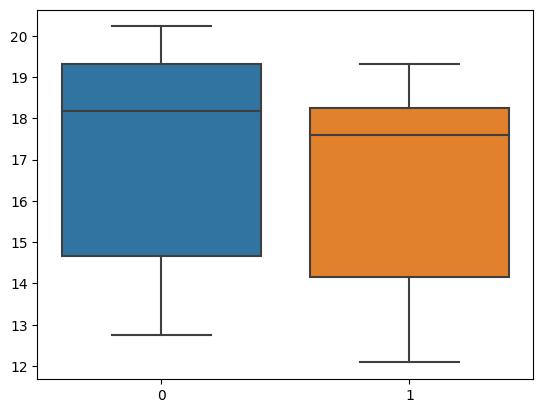

In [43]:
ax = sns.boxplot(data=[eval5[0],eval5a[0]])

# 15 mins ahead

In [44]:
model15 = keras.models.load_model("my_dir/8a-15")

In [45]:
model15_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-15") 

In [46]:
model15.predict((Wv15,Xv15))

array([[ 61.233555,  65.03271 ,  70.81219 , ...,  69.48351 ,  44.72526 ,
         47.613144],
       [ 58.509598,  61.455173,  66.41412 , ...,  63.012486,  42.03208 ,
         42.759056],
       [ 59.338234,  62.80031 ,  67.66392 , ...,  64.04135 ,  41.74335 ,
         42.258175],
       ...,
       [141.46136 , 142.42258 , 154.08113 , ..., 158.07558 , 104.77337 ,
         93.44982 ],
       [136.52338 , 145.02214 , 156.93636 , ..., 159.97939 , 106.66768 ,
         87.12106 ],
       [118.28583 , 128.00305 , 131.39111 , ..., 128.71664 ,  96.54586 ,
         83.05749 ]], dtype=float32)

In [47]:
model15_At_Conv_LSTM.predict((Wv15w, Wv15x, Xv15))

array([[ 62.400906,  65.96764 ,  69.66801 , ...,  70.309586,  46.35785 ,
         45.259422],
       [ 62.746403,  65.36727 ,  70.11771 , ...,  69.48969 ,  45.326225,
         46.493324],
       [ 63.943897,  66.1836  ,  70.83761 , ...,  70.241714,  46.05115 ,
         48.66731 ],
       ...,
       [136.4458  , 139.11201 , 154.78513 , ..., 154.78029 , 102.37128 ,
         97.54554 ],
       [129.60031 , 133.63426 , 145.89555 , ..., 147.3115  ,  96.74161 ,
         90.41813 ],
       [123.01244 , 128.53119 , 137.22485 , ..., 138.3281  ,  89.25339 ,
         81.83157 ]], dtype=float32)

### Evaluation on inverse_transform

In [48]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MAE15, RMSE15, MAPE15]
print(eval15)


test_predictions15 = model15_At_Conv_LSTM.predict((Wv15w, Wv15x, Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15a = [MAE15, RMSE15, MAPE15]
print(eval15a)

[18.566718252603106, 24.35166987056123, 9.676724042656511]
[17.49897421270349, 22.98040728523044, 9.175298073952796]


In [49]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15, multioutput='raw_values')

MAE15 = mean_absolute_error(yv15,test_predictions15, multioutput='raw_values')

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15, multioutput='raw_values')*100

eval15 = [MAE15, RMSE15, MAPE15]
print(eval15)

[array([19.0653747 , 20.83566532, 20.69844905, 16.22666169, 20.97499377,
       17.44080182, 14.72508141]), array([24.73098788, 27.57751729, 26.82262951, 20.86828396, 27.0952544 ,
       22.76557727, 19.27491917]), array([10.21989352, 10.33237195,  9.68332773,  8.24790849,  9.27232288,
       10.39765434,  9.58358939])]


In [50]:
test_predictions15 = model15_At_Conv_LSTM.predict((Wv15w, Wv15x, Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15, multioutput='raw_values')

MAE15 = mean_absolute_error(yv15,test_predictions15, multioutput='raw_values')

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15, multioutput='raw_values')*100

eval15a = [MAE15, RMSE15, MAPE15]
print(eval15a)

[array([18.23630592, 19.95123186, 19.55727123, 14.80806   , 19.47484018,
       16.48834748, 13.97676282]), array([23.5978851 , 26.30675344, 25.22813498, 19.01871469, 25.17410879,
       21.87270271, 18.37028023]), array([9.78015442, 9.99098165, 9.29635685, 7.66885559, 8.81142806,
       9.688181  , 8.99112895])]


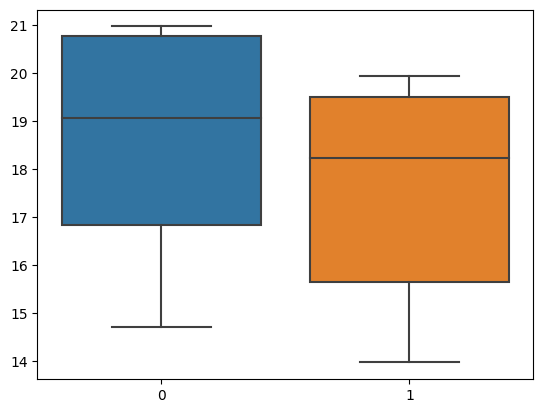

In [51]:
ax = sns.boxplot(data=[eval15[0],eval15a[0]])

# 30 mins ahead

In [52]:
model30 = keras.models.load_model("my_dir/8a-30")

In [53]:
model30_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-30") 

In [54]:
model30.predict((Wv30,Xv30))

array([[ 59.0234  ,  59.745167,  67.86776 , ...,  65.548004,  40.758648,
         39.201572],
       [ 53.89638 ,  54.72495 ,  61.49757 , ...,  59.944675,  39.26347 ,
         39.009193],
       [ 54.58972 ,  57.045506,  60.91811 , ...,  58.298862,  37.405384,
         37.499847],
       ...,
       [150.79024 , 150.52498 , 167.64687 , ..., 166.45929 , 112.65737 ,
        101.25627 ],
       [128.621   , 132.57933 , 143.09807 , ..., 144.51878 , 102.21832 ,
         95.60763 ],
       [127.51358 , 131.426   , 141.88033 , ..., 134.4235  ,  91.96049 ,
         84.91921 ]], dtype=float32)

In [55]:
model30_At_Conv_LSTM.predict((Wv30w, Wv30x, Xv30))

array([[ 59.362717,  61.451447,  65.54517 , ...,  62.3582  ,  41.758633,
         42.10194 ],
       [ 56.11958 ,  57.04493 ,  62.041496, ...,  58.339157,  39.207508,
         40.504757],
       [ 54.833553,  55.541576,  60.595062, ...,  57.656975,  38.716812,
         41.292133],
       ...,
       [144.08817 , 147.82147 , 160.07211 , ..., 158.37105 , 110.52066 ,
        101.1467  ],
       [134.45312 , 137.13098 , 149.60304 , ..., 147.06602 , 100.94774 ,
         93.341095],
       [120.55323 , 122.69648 , 134.74852 , ..., 132.30182 ,  85.642555,
         80.89279 ]], dtype=float32)

### Evaluation on inverse_transform

In [56]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MAE30, RMSE30, MAPE30]
print(eval30)


test_predictions30 = model30_At_Conv_LSTM.predict((Wv30w, Wv30x, Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30a = [MAE30, RMSE30, MAPE30]
print(eval30a)

[18.891957372872685, 24.91824791801469, 9.803982234181085]
[17.956378501223256, 23.631854404328024, 9.454296143451282]


In [57]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30, multioutput='raw_values')

MAE30 = mean_absolute_error(yv30,test_predictions30, multioutput='raw_values')

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30, multioutput='raw_values')*100

eval30 = [MAE30, RMSE30, MAPE30]
print(eval30)

[array([19.50623181, 21.43336259, 21.23623029, 16.21086945, 21.51518696,
       17.7250458 , 14.61677471]), array([25.40774482, 28.37509295, 27.57045045, 21.00402223, 27.90847804,
       23.3013416 , 19.30284445]), array([10.50546598, 10.60548126,  9.95930202,  8.24952994,  9.46666697,
       10.39044764,  9.45098182])]


In [58]:
test_predictions30 = model30_At_Conv_LSTM.predict((Wv30w, Wv30x, Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30, multioutput='raw_values')

MAE30 = mean_absolute_error(yv30,test_predictions30, multioutput='raw_values')

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30, multioutput='raw_values')*100

eval30a = [MAE30, RMSE30, MAPE30]
print(eval30a)

[array([18.56508746, 21.06065633, 19.96079324, 15.04172828, 19.78655042,
       17.02523717, 14.25459662]), array([24.00849994, 27.71677939, 25.81467547, 19.40574706, 25.62322168,
       22.63154601, 18.78581955]), array([10.13647354, 10.40968827,  9.55595662,  7.79062833,  8.95115342,
       10.05364415,  9.28252869])]


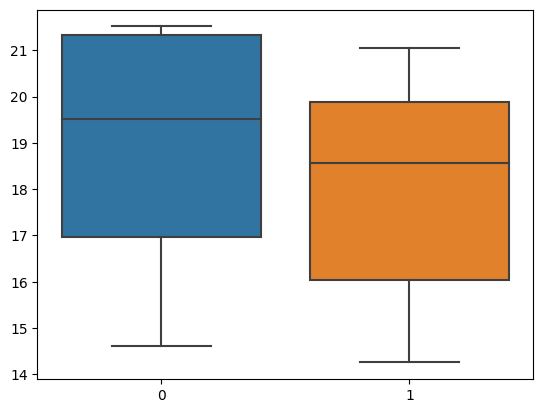

In [59]:
ax = sns.boxplot(data=[eval30[0],eval30a[0]])

# 60 mins ahead

In [60]:
model60 = keras.models.load_model("my_dir/8a-60")

In [61]:
model60_At_Conv_LSTM = keras.models.load_model("my_dir/6ai-Conv-LSTM-60")

In [62]:
model60.predict((Wv60,Xv60))

array([[ 52.280888,  54.74058 ,  60.751358, ...,  61.27484 ,  42.03901 ,
         41.673428],
       [ 49.847794,  52.421577,  56.76582 , ...,  55.568592,  39.15346 ,
         39.446575],
       [ 47.525677,  50.158978,  53.37129 , ...,  52.30347 ,  37.455605,
         40.917038],
       ...,
       [134.21024 , 138.58275 , 148.93797 , ..., 144.45366 ,  95.04853 ,
         86.20822 ],
       [130.81146 , 137.22534 , 144.57616 , ..., 140.95177 ,  93.62418 ,
         84.92316 ],
       [122.34152 , 125.462166, 135.98528 , ..., 132.48659 ,  88.46223 ,
         81.21717 ]], dtype=float32)

In [63]:
model60_At_Conv_LSTM.predict((Wv60w, Wv60x, Xv60))

array([[ 50.70656 ,  50.430004,  57.32698 , ...,  57.01328 ,  38.761116,
         37.437603],
       [ 49.427204,  50.007214,  56.883232, ...,  56.45015 ,  40.10421 ,
         37.3513  ],
       [ 45.49114 ,  46.29245 ,  51.9349  , ...,  50.562424,  36.617355,
         34.87856 ],
       ...,
       [137.31021 , 142.32536 , 152.76024 , ..., 149.80762 , 101.94713 ,
         91.46247 ],
       [133.27792 , 137.13043 , 149.68506 , ..., 146.37729 , 100.21352 ,
         88.98649 ],
       [127.16322 , 129.57076 , 144.35147 , ..., 138.19637 ,  93.6812  ,
         81.59621 ]], dtype=float32)

### Evaluation on inverse_transform

In [64]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MAE60, RMSE60, MAPE60]
print(eval60)


test_predictions60 = model60_At_Conv_LSTM.predict((Wv60w, Wv60x, Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60a = [MAE60, RMSE60, MAPE60]
print(eval60a)

[18.462906965948566, 24.355097054041913, 9.406459644810669]
[18.559450025880192, 24.29879012318357, 9.784624214849224]


In [65]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60, multioutput='raw_values')

MAE60 = mean_absolute_error(yv60,test_predictions60, multioutput='raw_values')

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60, multioutput='raw_values')*100

eval60 = [MAE60, RMSE60, MAPE60]
print(eval60)

[array([19.29579585, 21.3213072 , 20.85102021, 15.68516748, 20.98491376,
       17.04892126, 14.053223  ]), array([25.05323474, 28.07286488, 27.18038756, 20.26796644, 27.16459256,
       22.50531064, 18.50613212]), array([10.12349273, 10.31965695,  9.57008773,  7.81606208,  9.04147254,
        9.89044901,  9.08399646])]


In [66]:
test_predictions60 = model60_At_Conv_LSTM.predict((Wv60w, Wv60x, Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60, multioutput='raw_values')

MAE60 = mean_absolute_error(yv60,test_predictions60, multioutput='raw_values')

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60, multioutput='raw_values')*100

eval60a = [MAE60, RMSE60, MAPE60]
print(eval60a)

[array([18.87336383, 21.05917947, 20.46575641, 15.8981837 , 20.67789187,
       18.08073819, 14.86103672]), array([24.49651577, 27.53939119, 26.53536795, 20.2836397 , 26.56451887,
       23.91395179, 19.52993889]), array([10.32277702, 10.53107051,  9.77626813,  8.26526781,  9.36296555,
       10.59792188,  9.63609861])]


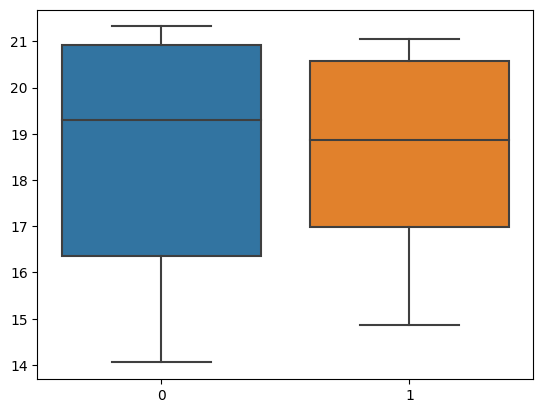

In [67]:
ax = sns.boxplot(data=[eval60[0],eval60a[0]])

# RESULTS

## General results

In [ ]:
l = ['MAE','RMSE','MAPE','Horizon']

In [ ]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [ ]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')